###  ---------------------------------------------------------------------------------------------------------------------------------------
##### Copyright (c) Rajdeep Biswas
##### Licensed under the MIT license.
###### File: snp500_news_eda.ipynb
###### Date: 10/10/2021
###  ---------------------------------------------------------------------------------------------------------------------------------------

### Table of Contents

* [Initial Configurations](#IC)
    * [Import Libraries](#IL)
    * [Autheticate the AML Workspace](#AML)
* [Get Data](#GD)
    * [Setup Directory Structure](#SD)
    * [Read Gold File](#RG)
* [Visualize Data](#VD)   
    * [Word Cloud](#WC)   
* [Apply NLP](#AN)   
    * [Azure Text Analytics](#AT)    

### Initial Configurations <a class="anchor" id="IC"></a>
#### Import Libraries <a class="anchor" id="IL"></a>

In [11]:
#Import required Libraries
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib.image import imread
import cv2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#pip install pandas_datareader
import pandas_datareader.data as web
import pandas as pd
import datetime as dt

import azureml.core
import azureml.automl
from azureml.core import Workspace, Dataset, Datastore



#viz
#pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 

#settings
color = sns.color_palette()
sns.set_style("dark")

#pip install WordCloud
from wordcloud import WordCloud

#### Autheticate the AML Workspace <a class="anchor" id="AML"></a>

In [3]:
import azureml.core
from azureml.core import Workspace

# Load the workspace from the saved config file
ws = Workspace.from_config()
print('Ready to use Azure ML {} to work with {}'.format(azureml.core.VERSION, ws.name))

Ready to use Azure ML 1.33.0 to work with houston-techsummit-workspace


### Get Data <a class="anchor" id="GD"></a>
#### Setup Directory Structure <a class="anchor" id="SD"></a>

In [5]:
data_folder = os.path.join(os.getcwd(), 'data')

#Create the data directory
os.makedirs(data_folder, exist_ok=True)

gold_data_folder = data_folder +"/gold"
os.makedirs(gold_data_folder, exist_ok=True)

#Create sub folder for stock news data in gold
news_data_gold = gold_data_folder +"/snp500_news"
os.makedirs(news_data_gold, exist_ok=True)

#### Read Gold File <a class="anchor" id="RG"></a>

In [6]:
output_file_name = news_data_gold + '/snp500_all_news.csv'
df_snp500_news_gold = pd.read_csv(output_file_name, index_col=None, header=0) 

In [7]:
df_snp500_news_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071500 entries, 0 to 2071499
Data columns (total 3 columns):
Ticker         object
NewsNum        int64
CleanedText    object
dtypes: int64(1), object(2)
memory usage: 47.4+ MB


In [8]:
df_snp500_news_gold.head()

,Ticker,NewsNum,CleanedText
0,A,0,santa clara calif september pfizer executive d...
1,A,1,santa clara calif september agilent announces ...
2,A,2,hedge fund manager william ackman bet universa...
3,A,3,smart beta etf report ftc
4,A,4,stock cut loss amid mixed economic data


In [9]:
df_snp500_news_gold.count()

Ticker         2071500
NewsNum        2071500
CleanedText    2071500
dtype: int64

### Visualize Data <a class="anchor" id="VD"></a>

#### Word Cloud <a class="anchor" id="WC"></a>
As a word cloud is a graphical representation of frequently used words in the texts 
so we are going to investigate the frequency of words in the reviews.

In [10]:
# Reviews for Apple
rev_apple = df_snp500_news_gold[df_snp500_news_gold['Ticker']=='AAPL']['CleanedText']

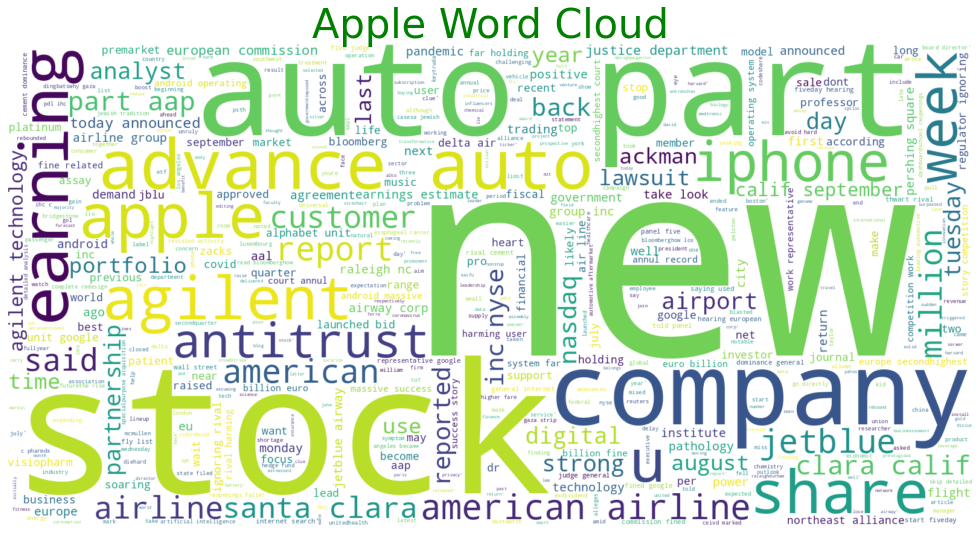

In [12]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(rev_apple)))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Apple Word Cloud", fontsize=40,color='Green')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

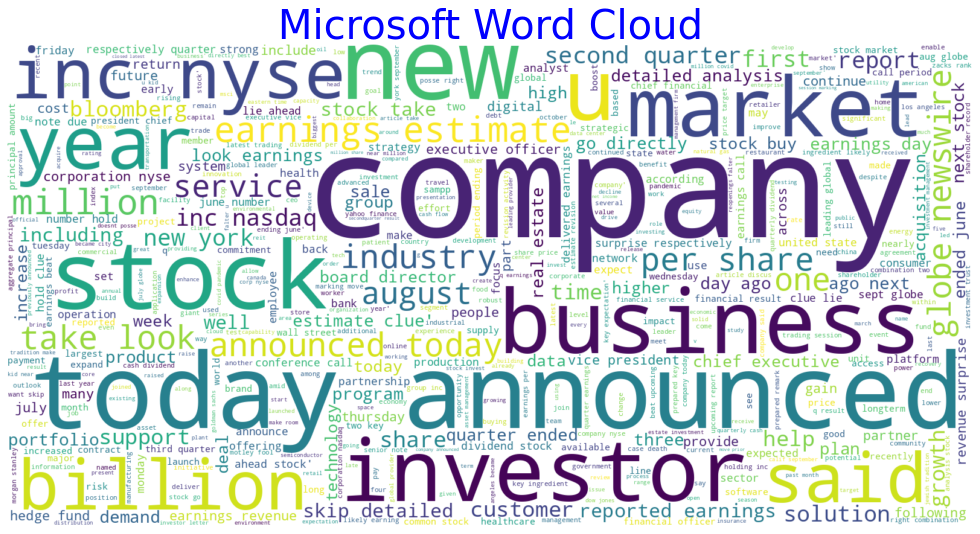

In [13]:
# Reviews for Microsoft
rev_msft = df_snp500_news_gold[df_snp500_news_gold['Ticker']=='MSFT']['CleanedText']
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=500, background_color='white',)
wordcloud.generate(str(set(rev_msft)))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Microsoft Word Cloud", fontsize=40,color='Blue')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

### Apply NLP <a class="anchor" id="AN"></a>
#### Azure Text Analytics <a class="anchor" id="AT"></a>

parameter	Description  
-X POST <endpoint>	Specifies your endpoint for accessing the API.  
-H Content-Type: application/json	The content type for sending JSON data.    
-H "Ocp-Apim-Subscription-Key:<key>	Specifies the key for accessing the API.  
-d <documents>	The JSON containing the documents you want to send.  

In [21]:
# %load ./credential.py

In [22]:
key = login['key']
endpoint = login['endpoint']

Object model:  
The Text Analytics client is a TextAnalyticsClient object that authenticates to Azure. The client provides several methods for analyzing text.

When batch processing text is sent to the API as a list of documents, which are dictionary objects containing a combination of id, text, and language attributes depending on the method used. The text attribute stores the text to be analyzed in the origin language, and the id can be any value.

The response object is a list containing the analyzed information for each document.

When using Text Analytics, the documents in your request must not exceed the following character limits. See the data limits article for more information.

Synchronous operations and Text Analytics for health operations: 5,120 characters per document.
Asynchronous (Analyze) operations: 125,000 characters per document.

In [29]:
#pip install azure.core.credentials
#pip install azure.ai.textanalytics

In [30]:
#Create a function to instantiate the TextAnalyticsClient object with your key AND endpoint created above. Then create a new client.
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=endpoint, 
            credential=ta_credential)
    return text_analytics_client

client = authenticate_client()

Create a new function called sentiment_analysis_example() that takes the client as an argument, then calls the analyze_sentiment() function. The returned response object will contain the sentiment label and score of the entire input document, as well as a sentiment analysis for each sentence.

Opinion mining:  
In order to do sentiment analysis with opinion mining, create a new function called sentiment_analysis_with_opinion_mining_example() that takes the client as an argument, then calls the analyze_sentiment() function with option flag show_opinion_mining=True. The returned response object will contain not only the sentiment label and score of the entire input document with sentiment analysis for each sentence, but also aspect and opinion level sentiment analysis.

In [33]:
rev_apple

120    santa clara calif september pfizer executive d...
121    santa clara calif september agilent announces ...
122    hedge fund manager william ackman bet universa...
123                            smart beta etf report ftc
124              stock cut loss amid mixed economic data
                             ...                        
195    global shopper face possible shortage smartpho...
196    bloomberg china embattled tech tycoon linedup ...
197    bloomberg iphone assembly operation china begi...
198    deal actually closed long time ago back near d...
199    almost hard believe successful berkshire hatha...
Name: CleanedText, Length: 80, dtype: object

In [36]:
type(rev_apple)

pandas.core.series.Series

In [49]:
documents = rev_apple[-3:]

In [77]:
def sentiment_analysis(client):

    #documents = ["I had the best day of my life. I wish you were there with me."]
    response = client.analyze_sentiment(documents)
    for resp in response:
        print("Document Sentiment: {}".format(resp.sentiment))
        print("Overall scores: positive={0:.2f}; neutral={1:.2f}; negative={2:.2f} \n".format(
            resp.confidence_scores.positive,
            resp.confidence_scores.neutral,
            resp.confidence_scores.negative,
        ))
        for idx, sentence in enumerate(resp.sentences):
            print("Sentence: {}".format(sentence.text))
            print("Sentence {} sentiment: {}".format(idx+1, sentence.sentiment))
            print("Sentence score:\nPositive={0:.2f}\nNeutral={1:.2f}\nNegative={2:.2f}\n".format(
                sentence.confidence_scores.positive,
                sentence.confidence_scores.neutral,
                sentence.confidence_scores.negative,
            ))

documents = rev_apple[-3:].values.tolist()        
sentiment_analysis(client)

Document Sentiment: neutral
Overall scores: positive=0.01; neutral=0.98; negative=0.01 

Sentence: bloomberg iphone assembly operation china beginning reduce energy consumption sudden power crunch country triggered governmentimposed curb range businessesmost read bloomberghow los angeles became city dingbatswhy gaza strip may city futurethe rise pandemic dashboardschool reopenings falter u kid near million covid casesa jewish tradition make room unconventional designpegatron corp
Sentence 1 sentiment: neutral
Sentence score:
Positive=0.01
Neutral=0.98
Negative=0.01

Document Sentiment: negative
Overall scores: positive=0.02; neutral=0.09; negative=0.89 

Sentence: deal actually closed long time ago back near dawn time two year ago precise long covid entered general lexicon face mask political talking point although long suspected taken finally confirm mystery silicon valley buyer
Sentence 1 sentiment: negative
Sentence score:
Positive=0.02
Neutral=0.09
Negative=0.89

Document Sentiment

In [104]:
#df_news_aapl = df_snp500_news_gold[df_snp500_news_gold['Ticker']=='AAPL'][-3:]
df_news_aapl = df_snp500_news_gold[df_snp500_news_gold['Ticker']=='AAPL'][-10:]
df_news_aapl.head(3)

,Ticker,NewsNum,CleanedText
190,AAPL,10,youre unitedhealth nyse unh member like work y...
191,AAPL,11,shift buy pay later installment plan millennia...
192,AAPL,12,luxembourg reuters alphabet unit google monday...


In [105]:
def sentiment_analysis(client):

    #documents = ["I had the best day of my life. I wish you were there with me."]
    response = client.analyze_sentiment(documents)
    for resp in response:
        #print("Document Sentiment: {}".format(resp.sentiment))
        sentiments.append(resp.sentiment)
        #for idx, sentence in enumerate(resp.sentences):
        #    print("Sentence: {}".format(sentence.text))

sentiments = []
documents = df_news_aapl['CleanedText'].values.tolist()        
sentiment_analysis(client)

In [93]:
sentiments

['neutral', 'negative', 'positive']

In [106]:
df_news_aapl= df_news_aapl.assign(Sentiment=sentiments)

In [107]:
df_news_aapl

,Ticker,NewsNum,CleanedText,Sentiment
190,AAPL,10,youre unitedhealth nyse unh member like work y...,neutral
191,AAPL,11,shift buy pay later installment plan millennia...,neutral
192,AAPL,12,luxembourg reuters alphabet unit google monday...,negative
193,AAPL,13,alphabet unit google monday criticised eu anti...,negative
194,AAPL,14,qorvo chip powerhouse striving digitally conne...,neutral
195,AAPL,15,global shopper face possible shortage smartpho...,neutral
196,AAPL,16,bloomberg china embattled tech tycoon linedup ...,neutral
197,AAPL,17,bloomberg iphone assembly operation china begi...,neutral
198,AAPL,18,deal actually closed long time ago back near d...,negative
199,AAPL,19,almost hard believe successful berkshire hatha...,positive


In [109]:
test = df_snp500_news_gold[df_snp500_news_gold['Ticker']=='AAPL']
test.count()

Ticker         80
NewsNum        80
CleanedText    80
dtype: int64

In [119]:
test.shape[0]/10

8.0

In [154]:
import math
x = 0
for i in range(int(math.floor(test.shape[0]/10))):
    #print (test[x:x + 10])
    x = x + 10

In [163]:
def sentiment_analysis(client):

    #documents = ["I had the best day of my life. I wish you were there with me."]
    response = client.analyze_sentiment(documents)
    for resp in response:
        #print("Document Sentiment: {}".format(resp.sentiment))
        sentiments.append(resp.sentiment)
        #for idx, sentence in enumerate(resp.sentences):
        #    print("Sentence: {}".format(sentence.text))

In [164]:
df_news_aapl = df_snp500_news_gold[df_snp500_news_gold['Ticker']=='AAPL']  
df_news_aapl_2 = pd.DataFrame(columns = ["Ticker", "NewsNum", "CleanedText", "Sentiment"])

In [166]:
df_news_aapl_2

,Ticker,NewsNum,CleanedText,Sentiment
120,AAPL,0,santa clara calif september pfizer executive d...,neutral
121,AAPL,1,santa clara calif september agilent announces ...,neutral
122,AAPL,2,hedge fund manager william ackman bet universa...,neutral
123,AAPL,3,smart beta etf report ftc,neutral
124,AAPL,4,stock cut loss amid mixed economic data,neutral
...,...,...,...,...
195,AAPL,15,global shopper face possible shortage smartpho...,neutral
196,AAPL,16,bloomberg china embattled tech tycoon linedup ...,neutral
197,AAPL,17,bloomberg iphone assembly operation china begi...,neutral
198,AAPL,18,deal actually closed long time ago back near d...,negative


In [151]:
#Create sub folder for stock news data in gold
news_data_gold_sentiment = news_data_gold +"/news_with_sentiment"
os.makedirs(news_data_gold_sentiment, exist_ok=True)

In [152]:
output_file_name = news_data_gold_sentiment + '/apple_sentiment.csv'
df_news_aapl_2.to_csv(output_file_name, index=False)  

In [153]:
test_df = pd.read_csv(output_file_name, index_col=None, header=0)
test_df

,Ticker,NewsNum,CleanedText,Sentiment
0,AAPL,0,santa clara calif september pfizer executive d...,neutral
1,AAPL,1,santa clara calif september agilent announces ...,neutral
2,AAPL,2,hedge fund manager william ackman bet universa...,neutral
3,AAPL,3,smart beta etf report ftc,neutral
4,AAPL,4,stock cut loss amid mixed economic data,neutral
...,...,...,...,...
75,AAPL,15,global shopper face possible shortage smartpho...,neutral
76,AAPL,16,bloomberg china embattled tech tycoon linedup ...,neutral
77,AAPL,17,bloomberg iphone assembly operation china begi...,neutral
78,AAPL,18,deal actually closed long time ago back near d...,negative


#### Apple Sentiment Distribution

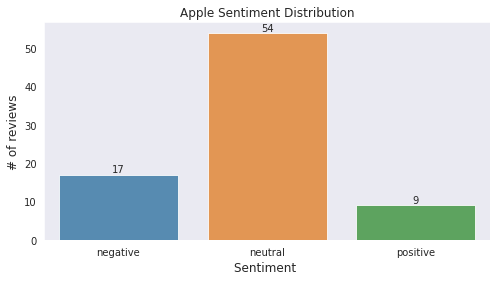

In [161]:
#Get the distribution of the ratings
x=test_df['Sentiment'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Apple Sentiment Distribution")
plt.ylabel('# of reviews', fontsize=12)
plt.xlabel('Sentiment ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

plt.show()

In [186]:
def sentiment_analysis_with_opinion_mining(client,documents):

    #documents = [
    #    "global shopper face possible shortage smartphones good ahead christmas power cut meet government energy use target forced chinese factory shut left household dark"
    #]
    #print(documents)
    result = client.analyze_sentiment(documents, show_opinion_mining=True)
    doc_result = [doc for doc in result if not doc.is_error]
    #print(doc_result)

    positive_reviews = [doc for doc in doc_result if doc.sentiment == "positive"]
    negative_reviews = [doc for doc in doc_result if doc.sentiment == "negative"]

    positive_mined_opinions = []
    mixed_mined_opinions = []
    negative_mined_opinions = []

    for document in doc_result:
        """
        print("Document Sentiment: {}".format(document.sentiment))
        print("Overall scores: positive={0:.2f}; neutral={1:.2f}; negative={2:.2f} \n".format(
            document.confidence_scores.positive,
            document.confidence_scores.neutral,
            document.confidence_scores.negative,
        ))
        """
        for sentence in document.sentences:
            print("Sentence: {}".format(sentence.text))
            print(sentence.mined_opinions)
            """
            print("Sentence: {}".format(sentence.text))
            print("Sentence sentiment: {}".format(sentence.sentiment))
            print("Sentence score:\nPositive={0:.2f}\nNeutral={1:.2f}\nNegative={2:.2f}\n".format(
                sentence.confidence_scores.positive,
                sentence.confidence_scores.neutral,
                sentence.confidence_scores.negative,
            ))
            """
            for mined_opinion in sentence.mined_opinions:
                #print("Sentence: {}".format(sentence.text))
                target = mined_opinion.target
                print("......'{}' target '{}'".format(target.sentiment, target.text))
                print("......Target score:\n......Positive={0:.2f}\n......Negative={1:.2f}\n".format(
                    target.confidence_scores.positive,
                    target.confidence_scores.negative,
                ))
                for assessment in mined_opinion.assessments:
                    print("......'{}' assessment '{}'".format(assessment.sentiment, assessment.text))
                    print("......Assessment score:\n......Positive={0:.2f}\n......Negative={1:.2f}\n".format(
                        assessment.confidence_scores.positive,
                        assessment.confidence_scores.negative,
                    ))
            #print("\n")
        #print("\n")
          
sentiment_analysis_with_opinion_mining(client,documents)

Sentence: youre unitedhealth nyse unh member like work youre luck insurance giant announced new benefit member free peloton nasdaq pton digital subscription news win unitedhealth member also peloton entrenches leadership digital fitness pull whole new prospective customer base
[]
Sentence: shift buy pay later installment plan millennials gen zers ecommerce financial tech firm scrambling
[]
Sentence: luxembourg reuters alphabet unit google monday blasted eu antitrust regulator ignoring rival apple launched bid get europe secondhighest court annul record billion euro $ billion fine related android operating system far holding back rival harming user android massive success story competition work representative google told panel five judge general court start fiveday hearing european commission fined google saying used android since thwart rival cement dominance general internet search
[]
Sentence: alphabet unit google monday criticised eu antitrust regulator ignoring rival apple launched

In [188]:
def sentiment_analysis_with_opinion_mining(client):

    documents = [
        "A major crypto hedge-fund manager expects bitcoin to tumble once the SEC greenlights a bitcoin-backed ETF—Here’s why"
    ]
    #print(documents)
    result = client.analyze_sentiment(documents, show_opinion_mining=True)
    doc_result = [doc for doc in result if not doc.is_error]
    #print(doc_result)

    positive_reviews = [doc for doc in doc_result if doc.sentiment == "positive"]
    negative_reviews = [doc for doc in doc_result if doc.sentiment == "negative"]

    positive_mined_opinions = []
    mixed_mined_opinions = []
    negative_mined_opinions = []

    for document in doc_result:
        """
        print("Document Sentiment: {}".format(document.sentiment))
        print("Overall scores: positive={0:.2f}; neutral={1:.2f}; negative={2:.2f} \n".format(
            document.confidence_scores.positive,
            document.confidence_scores.neutral,
            document.confidence_scores.negative,
        ))
        """
        for sentence in document.sentences:
            print("Sentence: {}".format(sentence.text))
            print(sentence.mined_opinions)
            """
            print("Sentence: {}".format(sentence.text))
            print("Sentence sentiment: {}".format(sentence.sentiment))
            print("Sentence score:\nPositive={0:.2f}\nNeutral={1:.2f}\nNegative={2:.2f}\n".format(
                sentence.confidence_scores.positive,
                sentence.confidence_scores.neutral,
                sentence.confidence_scores.negative,
            ))
            """
            for mined_opinion in sentence.mined_opinions:
                #print("Sentence: {}".format(sentence.text))
                target = mined_opinion.target
                print("......'{}' target '{}'".format(target.sentiment, target.text))
                print("......Target score:\n......Positive={0:.2f}\n......Negative={1:.2f}\n".format(
                    target.confidence_scores.positive,
                    target.confidence_scores.negative,
                ))
                for assessment in mined_opinion.assessments:
                    print("......'{}' assessment '{}'".format(assessment.sentiment, assessment.text))
                    print("......Assessment score:\n......Positive={0:.2f}\n......Negative={1:.2f}\n".format(
                        assessment.confidence_scores.positive,
                        assessment.confidence_scores.negative,
                    ))
            #print("\n")
        #print("\n")
          
sentiment_analysis_with_opinion_mining(client)

Sentence: A major crypto hedge-fund manager expects bitcoin to tumble once the SEC greenlights a bitcoin-backed ETF—Here’s why
[]
